### Reference [1]
https://www.algoritmaornekleri.com/makine-ogrenimi/kaggle-notebooks-kullanimi-basit-ornek/

In [1]:
# Reference [1]
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flower-classification-with-tpus/sample_submission.csv
/kaggle/input/flower-classification-with-tpus/tfrecords-jpeg-224x224/val/09-224x224-232.tfrec
/kaggle/input/flower-classification-with-tpus/tfrecords-jpeg-224x224/val/14-224x224-232.tfrec
/kaggle/input/flower-classification-with-tpus/tfrecords-jpeg-224x224/val/01-224x224-232.tfrec
/kaggle/input/flower-classification-with-tpus/tfrecords-jpeg-224x224/val/13-224x224-232.tfrec
/kaggle/input/flower-classification-with-tpus/tfrecords-jpeg-224x224/val/00-224x224-232.tfrec
/kaggle/input/flower-classification-with-tpus/tfrecords-jpeg-224x224/val/07-224x224-232.tfrec
/kaggle/input/flower-classification-with-tpus/tfrecords-jpeg-224x224/val/12-224x224-232.tfrec
/kaggle/input/flower-classification-with-tpus/tfrecords-jpeg-224x224/val/11-224x224-232.tfrec
/kaggle/input/flower-classification-with-tpus/tfrecords-jpeg-224x224/val/05-224x224-232.tfrec
/kaggle/input/flower-classification-with-tpus/tfrecords-jpeg-224x224/val/04-224x224-23

# 1. Data Preprocessing:

In [2]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the dataset
data_dir = '/kaggle/input/flower-classification-with-tpus'

# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)


D1105 07:25:06.926214680     170 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D1105 07:25:06.926241228     170 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D1105 07:25:06.926245155     170 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D1105 07:25:06.926248127     170 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D1105 07:25:06.926250720     170 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D1105 07:25:06.926253532     170 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D1105 07:25:06.926256296     170 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D1105 07:25:06.

Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


# Load Data

### Reference: https://www.kaggle.com/code/sathviknitap/tpu-flower-classification-assignment

In [3]:
IMAGE_SIZE = [192, 192] # at this size, a GPU will run out of memory. Use the TPU
EPOCHS = 5
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

NUM_TRAINING_IMAGES = 12753
NUM_TEST_IMAGES = 7382
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.image.resize(image, (192, 192))  # Resize the image to the expected input shape
    return image


def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = tf.cast(example['class'], tf.int32)
    return image, label # returns a dataset of (image, label) pairs

def read_unlabeled_tfrecord(example):
    UNLABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "id": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        # class is missing, this competitions's challenge is to predict flower classes for the test dataset
    }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    idnum = example['id']
    return image, idnum # returns a dataset of image(s)

def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord if labeled else read_unlabeled_tfrecord)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def get_training_dataset():
    dataset = load_dataset(tf.io.gfile.glob(data_dir + '/tfrecords-jpeg-192x192/train/*.tfrec'), labeled=True)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

def get_validation_dataset():
    dataset = load_dataset(tf.io.gfile.glob(data_dir + '/tfrecords-jpeg-192x192/val/*.tfrec'), labeled=True, ordered=False)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    return dataset

def get_test_dataset(ordered=False):
    dataset = load_dataset(tf.io.gfile.glob(data_dir + '/tfrecords-jpeg-192x192/test/*.tfrec'), labeled=False, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

training_dataset = get_training_dataset()
validation_dataset = get_validation_dataset()

# Data augmentation


In [4]:
# My contribution comes here


from tensorflow import image as tf_image

def augment_image(image, label):
    # Data augmentation
    image = tf_image.random_flip_left_right(image)
    image = tf_image.random_contrast(image, 0.8, 1.2)
    # Add more data augmentation functions as needed

    return image, label

def get_training_dataset(augment=True):
    dataset = load_dataset(tf.io.gfile.glob(data_dir + '/tfrecords-jpeg-192x192/train/*.tfrec'), labeled=True)
    dataset = dataset.repeat()  # The training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    
    if augment:
        dataset = dataset.map(augment_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

def get_testing_dataset():
    dataset = load_dataset(tf.io.gfile.glob(data_dir + '/tfrecords-jpeg-192x192/test/*.tfrec'), labeled=True)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

training_dataset = get_training_dataset(augment=True)
testing_dataset = get_testing_dataset()


# 2. Model Architecture:

In [5]:
# My contribution comes here


from tensorflow.keras import layers, models

# Define the CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten the output of the convolutional layers
    model.add(layers.Flatten())
    
    # Fully connected layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# Define the input shape and number of classes
input_shape = (*IMAGE_SIZE, 3)  # Use the same shape as the preprocessed dataset
num_classes = 10  # Adjust this based on the number of classes in your dataset

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Optionally, you can print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 190, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 95, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 135424)            0         
                                                                 
 dense (Dense)               (None, 64)                8

# 3. Training and Recording Metrics:

### Reference: https://www.kaggle.com/code/sathviknitap/tpu-flower-classification-assignment

In [12]:
# Train the model
with strategy.scope():
    pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
    pretrained_model.trainable = False  # Transfer learning

    model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(104, activation='softmax')
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)


# My contribution comes here
# Training the model and recording the history
history = model.fit(training_dataset, epochs=EPOCHS, validation_data=validation_dataset, steps_per_epoch=STEPS_PER_EPOCH)

# Record performance metrics
accuracy = history.history['sparse_categorical_accuracy']
val_accuracy = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Optionally, you can print or save the training history for further analysis
print("Training Accuracy:", accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training Loss:", loss)
print("Validation Loss:", val_loss)


Epoch 1/5


2023-11-05 07:35:50.440377: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-11-05 07:35:50.500448: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


99/99 [==============================] - ETA: 0s - loss: 4.0311 - sparse_categorical_accuracy: 0.1077

2023-11-05 07:36:03.054570: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-11-05 07:36:03.164961: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


99/99 [==============================] - 21s 133ms/step - loss: 4.0311 - sparse_categorical_accuracy: 0.1077 - val_loss: 3.7172 - val_sparse_categorical_accuracy: 0.1848
Epoch 2/5
99/99 [==============================] - 6s 61ms/step - loss: 3.5348 - sparse_categorical_accuracy: 0.2062 - val_loss: 3.3709 - val_sparse_categorical_accuracy: 0.2465
Epoch 3/5
99/99 [==============================] - 6s 61ms/step - loss: 3.2319 - sparse_categorical_accuracy: 0.2644 - val_loss: 3.1208 - val_sparse_categorical_accuracy: 0.2866
Epoch 4/5
99/99 [==============================] - 6s 61ms/step - loss: 2.9958 - sparse_categorical_accuracy: 0.3155 - val_loss: 2.9256 - val_sparse_categorical_accuracy: 0.3386
Epoch 5/5
99/99 [==============================] - 6s 61ms/step - loss: 2.8180 - sparse_categorical_accuracy: 0.3574 - val_loss: 2.7684 - val_sparse_categorical_accuracy: 0.3704
Training Accuracy: [0.10771780461072922, 0.2062026560306549, 0.26444128155708313, 0.3154987394809723, 0.35740214586257

# 4. Hyperparameter Tuning:

In [14]:
# My contribution comes here

# Define a list of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1]

# Create lists to store performance metrics
all_train_accuracy = []
all_val_accuracy = []
all_train_loss = []
all_val_loss = []

# Loop through different learning rates
for learning_rate in learning_rates:
    # Build and compile the model with the current learning rate
    model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(104, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )

    # Train the model and record performance metrics
    history = model.fit(training_dataset, epochs=EPOCHS, validation_data=validation_dataset, steps_per_epoch=STEPS_PER_EPOCH)
    
    # Record performance metrics for this learning rate
    train_accuracy = history.history['sparse_categorical_accuracy']
    val_accuracy = history.history['val_sparse_categorical_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    all_train_accuracy.append(train_accuracy)
    all_val_accuracy.append(val_accuracy)
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)

# Optionally, you can print or save the performance metrics for analysis
for i, learning_rate in enumerate(learning_rates):
    print(f"Learning Rate: {learning_rate}")
    print(f"Training Accuracy: {all_train_accuracy[i]}")
    print(f"Validation Accuracy: {all_val_accuracy[i]}")
    print(f"Training Loss: {all_train_loss[i]}")
    print(f"Validation Loss: {all_val_loss[i]}")


Epoch 1/5
99/99 [==============================] - 240s 2s/step - loss: 4.0234 - sparse_categorical_accuracy: 0.1062 - val_loss: 3.7139 - val_sparse_categorical_accuracy: 0.1813
Epoch 2/5
99/99 [==============================] - 240s 2s/step - loss: 3.5263 - sparse_categorical_accuracy: 0.2129 - val_loss: 3.3678 - val_sparse_categorical_accuracy: 0.2406
Epoch 3/5
99/99 [==============================] - 241s 2s/step - loss: 3.2314 - sparse_categorical_accuracy: 0.2655 - val_loss: 3.1144 - val_sparse_categorical_accuracy: 0.2802
Epoch 4/5
99/99 [==============================] - 241s 2s/step - loss: 2.9931 - sparse_categorical_accuracy: 0.3141 - val_loss: 2.9202 - val_sparse_categorical_accuracy: 0.3419
Epoch 5/5
99/99 [==============================] - 241s 2s/step - loss: 2.8089 - sparse_categorical_accuracy: 0.3612 - val_loss: 2.7639 - val_sparse_categorical_accuracy: 0.3737
Epoch 1/5
99/99 [==============================] - 243s 2s/step - loss: 3.1272 - sparse_categorical_accuracy: 

# 6. Create Charts and Visualizations:

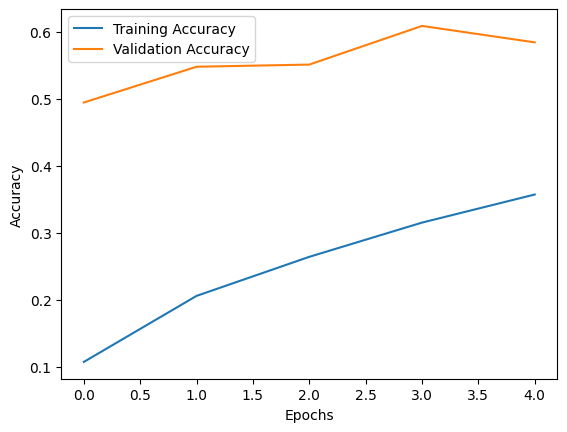

In [36]:
# My contribution comes here

import matplotlib.pyplot as plt

# Plot accuracy over epochs
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


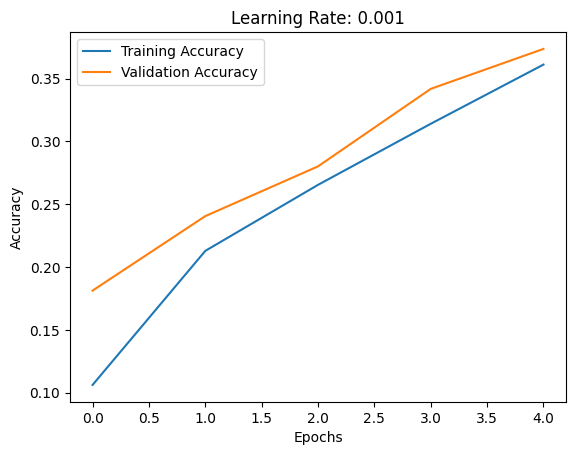

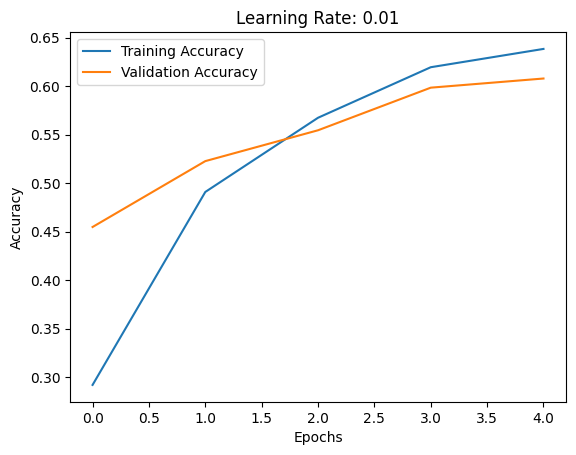

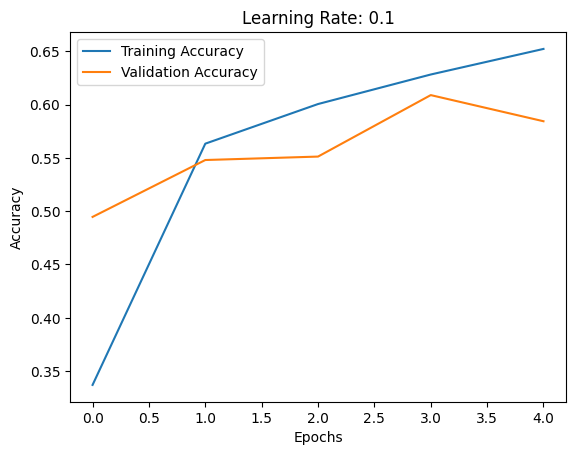

In [46]:
# My contribution comes here

for i, learning_rate in enumerate(learning_rates):
    plt.figure()  # Create a new figure for each learning rate
    plt.plot(all_train_accuracy[i], label='Training Accuracy')
    plt.plot(all_val_accuracy[i], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Rate: {learning_rate}')
    plt.legend()
    plt.show()
